### The following data sets have been stripped of all Disney-Marvel movies
This will show the action/adventure categories without the bias of non-superhero movies

#### Import all of the packages

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set(style = 'darkgrid')
%matplotlib inline

In [60]:
# import the data into dataframes

df = pd.read_csv('../data/profit_data.csv')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
#display(df)

#### Make the custom columns that I need

In [61]:
df['foreign_gross'] = df.worldwide_gross - df.domestic_gross
df['total_profit'] = df['worldwide_gross'] - df['production_budget']
df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['foreign_profit'] = df['foreign_gross'] - df['production_budget']
df['rev2bud_dom'] = df.domestic_gross/df.production_budget
df['rev2bud_for'] = df.foreign_gross/df.production_budget
df['rev2bud_wld'] = df.worldwide_gross/df.production_budget
df['primary_genre'] = df.genres.str.split(',', n = 1, expand = True)[0]
df['secondary_genre'] = df.genres.str.split(',', n = 1, expand = True)[1]

#### Create dataframes based on genre

In [62]:
horror_df = df[(df['primary_genre'] == 'Horror')]
action_df = df[(df['primary_genre'] == 'Action')]
drama_df = df[(df['primary_genre'] == 'Drama')]
advent_df = df[df['primary_genre'] == 'Adventure']
comedy_df = df[(df['primary_genre'] == 'Comedy')]
bio_df = df[(df['primary_genre'] == 'Biography')]

horror_df = horror_df[horror_df.title != 'coco']

#### Created a new df that looked for movies that did very well globally compared to domestically

In [63]:
oversea_df = df[(df.worldwide_gross_z) >= (3 * df.domestic_gross_z)]


#### Re-doing graphs from initial view into our custom dataset

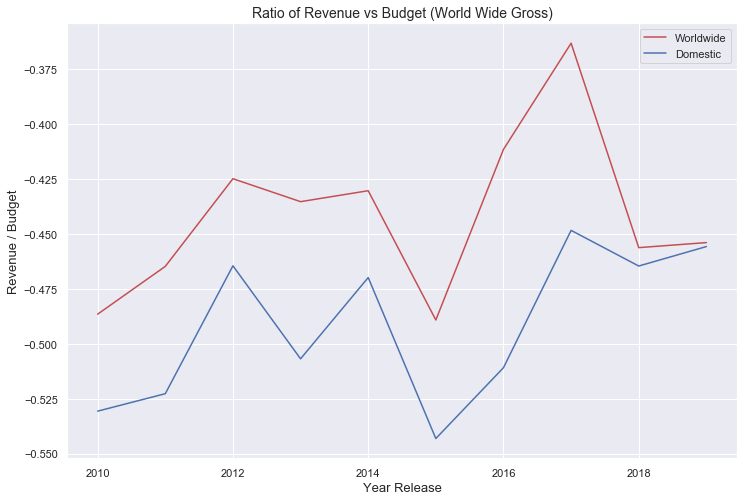

In [7]:

y1 = oversea_df.groupby(['year'])['worldwide_gross_z'].mean()
x1 = y1.index

y2 = oversea_df.groupby(['year'])['domestic_gross_z'].mean()
x2 = y2.index

plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'r', label = 'Worldwide') # plotting Horror separately 
plt.plot(x2, y2, 'b', label = 'Domestic') # plotting Drama separately 

plt.legend()

plt.title('Ratio of Revenue vs Budget (World Wide Gross)', fontsize = 14)
plt.ylabel('Revenue / Budget', fontsize = 13)
plt.xlabel('Year Release', fontsize = 13)
plt.show()

In [47]:
dat = oversea_df[oversea_df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Crime'])]
dat = dat[['primary_genre', 'worldwide_gross']]
#dat = dat.sort_values(by = 'worldwide_gross_z', ascending = False).head(10)

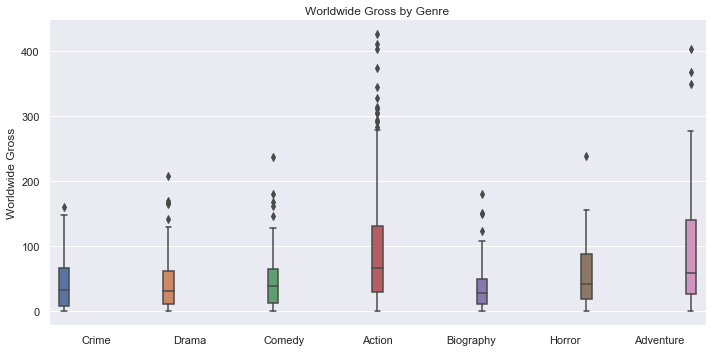

In [48]:
g = sns.catplot(x="primary_genre", y="worldwide_gross", hue="primary_genre", data=dat, kind = 'box', aspect = 2)
g.set(title = "Worldwide Gross by Genre", xlabel = "", ylabel = "Worldwide Gross")

plt.show()

In [15]:
dat = oversea_df[oversea_df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Crime'])]
dat = dat[['year', 'worldwide_gross_z']]


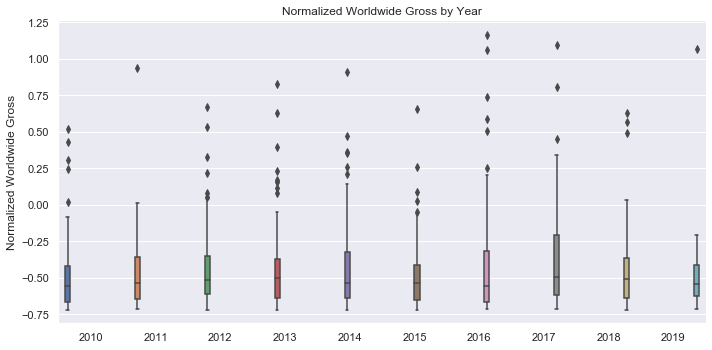

In [16]:

g = sns.catplot(x="year", y="worldwide_gross_z", hue="year", data=dat, kind = 'box', aspect = 2)
g.set(title = "Normalized Worldwide Gross by Year", xlabel = "", ylabel = "Normalized Worldwide Gross")

plt.show()

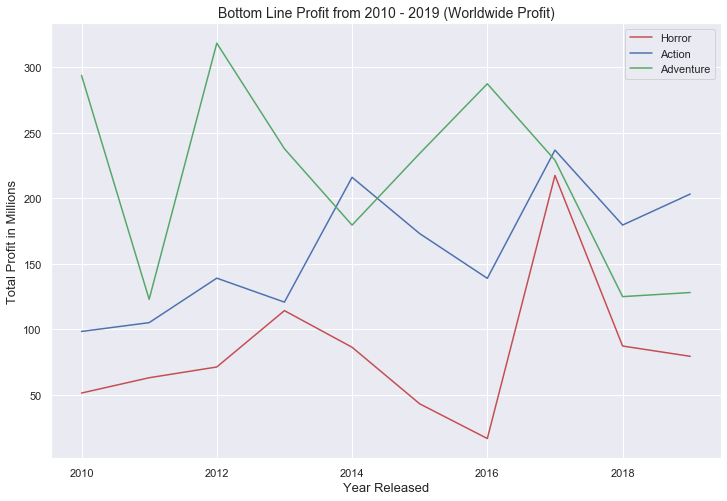

In [10]:
y1 = horror_df.groupby(['year'])['total_profit'].mean()
x1 = y1.index

y2 = action_df.groupby(['year'])['total_profit'].mean()
x2 = y2.index

y3 = advent_df.groupby(['year'])['total_profit'].mean()
x3 = y3.index


plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'r', label = 'Horror') # plotting horror separately 
plt.plot(x2, y2, 'b', label = 'Action') # plotting action separately 
plt.plot(x3, y3, 'g', label = 'Adventure') # plotting adventure separately 


#they are all combined on the final graph
plt.legend(loc = 'best')

plt.title('Bottom Line Profit from 2010 - 2019 (Worldwide Profit)', fontsize = 14)
plt.ylabel('Total Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

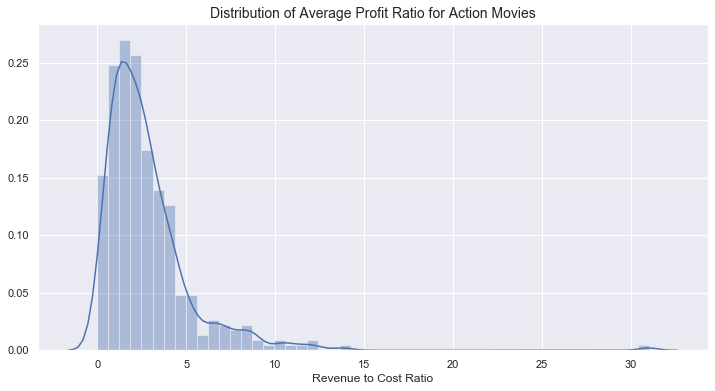

In [11]:
Y = action_df.rev2bud_wld.dropna().sort_values()

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot( Y, ax = ax)


#sns.barplot(x = "names", y = "values", ax=ax, data=df)

plt.title("Distribution of Average Profit Ratio for Action Movies", fontsize = 14)
plt.xlabel("Revenue to Cost Ratio", fontsize = 12)

plt.show()

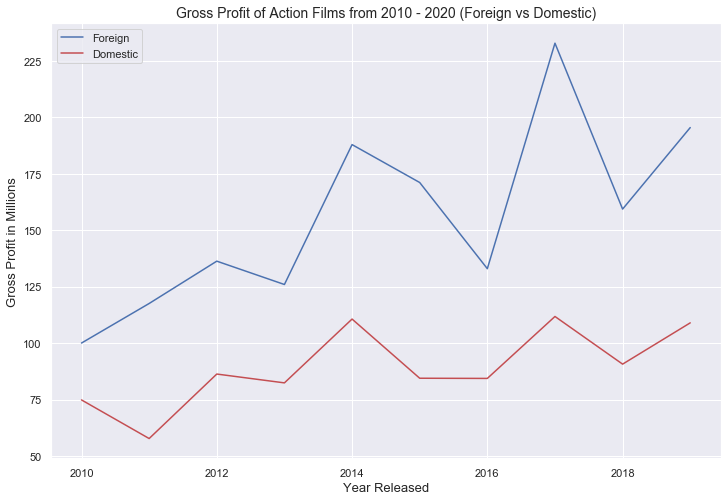

In [12]:
y1 = action_df.groupby(['year'])['foreign_gross'].mean()
x1 = y1.index

y2 = action_df.groupby(['year'])['domestic_gross'].mean()
x2 = y2.index


plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'b', label = 'Foreign') # plotting foreign separately 
plt.plot(x2, y2, 'r', label = 'Domestic') # plotting domestic separately 

#they are all combined on the final graph
plt.legend(loc = 'upper left')

plt.title('Gross Profit of Action Films from 2010 - 2020 (Foreign vs Domestic)', fontsize = 14)
plt.ylabel('Gross Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

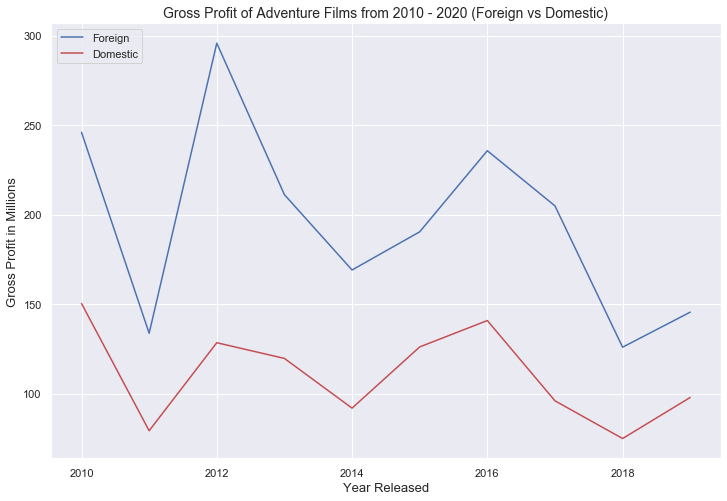

In [13]:
y1 = advent_df.groupby(['year'])['foreign_gross'].mean()
x1 = y1.index

y2 = advent_df.groupby(['year'])['domestic_gross'].mean()
x2 = y2.index


plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'b', label = 'Foreign') # plotting foreign separately 
plt.plot(x2, y2, 'r', label = 'Domestic') # plotting domestic separately 

#they are all combined on the final graph
plt.legend(loc = 'upper left')

plt.title('Gross Profit of Adventure Films from 2010 - 2020 (Foreign vs Domestic)', fontsize = 14)
plt.ylabel('Gross Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

In [31]:
action_df.sort_values(by = 'worldwide_gross_z', ascending = False).head(10)['title']

525                                 jurassic world
593                                      furious 7
967                 jurassic world: fallen kingdom
754                                  incredibles 2
931                        the fate of the furious
81                                         skyfall
455                transformers: age of extinction
908                   rogue one: a star wars story
1      pirates of the caribbean: on stranger tides
970                 jumanji: welcome to the jungle
Name: title, dtype: object

#### This is a good example of independent superhero movies coming to the market

In [69]:
df[df['title'] == 'brightburn']

,Unnamed: 0,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,month,studio,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,actors,directors,producers,editors,writers,worldwide_gross_z,domestic_gross_z,foreign_gross,total_profit,domestic_profit,foreign_profit,rev2bud_dom,rev2bud_for,rev2bud_wld,primary_genre,secondary_genre
1171,3459,21.777,1607,531309,False,en,brightburn,6.0,What if a child from another world crash-lande...,R,2019,5,NaN,7.0,16.79,27.99,tt7752126,brightburn,Brightburn,2019,90.0,"Horror,Sci-Fi",6.5,12515,"David Denman,Elizabeth Banks,Jackson A. Dunn,A...",David Yarovesky,"James Gunn,Kenneth Huang",NaN,"Brian Gunn,Mark Gunn",-0.59358,-0.604357,11.2,20.99,9.79,4.2,2.398571,1.6,3.998571,Horror,Sci-Fi
